# Module 12 Challenge
## Deliverable 2: Scrape and Analyze Mars Weather Data

In [29]:
# Import relevant libraries
from splinter import Browser
from bs4 import BeautifulSoup as soup
import matplotlib.pyplot as plt
import pandas as pd
from IPython.display import display
import os

In [30]:
browser = Browser('chrome')

### Step 1: Visit the Website

Use automated browsing to visit the [Mars Temperature Data Site](https://static.bc-edx.com/data/web/mars_facts/temperature.html). Inspect the page to identify which elements to scrape.

   > **Hint** To identify which elements to scrape, you might want to inspect the page by using Chrome DevTools to discover whether the table contains usable classes.


In [31]:
# Visit the website
# https://static.bc-edx.com/data/web/mars_facts/temperature.html
url = "https://static.bc-edx.com/data/web/mars_facts/temperature.html"
browser.visit(url)

### Step 2: Scrape the Table

Create a Beautiful Soup object and use it to scrape the data in the HTML table.

Note that this can also be achieved by using the Pandas `read_html` function. However, use Beautiful Soup here to continue sharpening your web scraping skills.

In [32]:
# Create a Beautiful Soup Object

# Load the browser's HTML into BeautifulSoup
html = browser.html
mars_data = soup(html, 'html.parser')

In [33]:
# Extract all rows of data

# Find the table element (adjust the selector as needed)
table = mars_data.find('table')

# Check if the table is found
if table:
    # Iterate through the rows in the table body
    rows = table.tbody.find_all('tr')
    for row in rows:
        # Check if the row contains data cells (not header cells)
        if not row.find('th'):
            # Extract data from each cell in the row
            cells = row.find_all('td')
            row_data = [cell.text.strip() for cell in cells]

            # Display the extracted data rows
            print(row_data)

['2', '2012-08-16', '10', '155', '6', '-75.0', '739.0']
['13', '2012-08-17', '11', '156', '6', '-76.0', '740.0']
['24', '2012-08-18', '12', '156', '6', '-76.0', '741.0']
['35', '2012-08-19', '13', '157', '6', '-74.0', '732.0']
['46', '2012-08-20', '14', '157', '6', '-74.0', '740.0']
['57', '2012-08-21', '15', '158', '6', '-78.0', '740.0']
['68', '2012-08-22', '16', '158', '6', '-77.0', '740.0']
['79', '2012-08-23', '17', '159', '6', '-76.0', '742.0']
['112', '2012-08-27', '21', '161', '6', '-74.0', '741.0']
['114', '2012-08-28', '22', '162', '6', '-74.0', '742.0']
['123', '2012-08-29', '23', '162', '6', '-75.0', '741.0']
['134', '2012-08-30', '24', '163', '6', '-75.0', '742.0']
['145', '2012-08-31', '25', '163', '6', '-75.0', '743.0']
['156', '2012-09-01', '26', '164', '6', '-76.0', '745.0']
['163', '2012-09-02', '27', '164', '6', '-75.0', '743.0']
['170', '2012-09-03', '28', '165', '6', '-75.0', '745.0']
['171', '2012-09-04', '29', '166', '6', '-75.0', '747.0']
['172', '2012-09-05', '

### Step 3: Store the Data

Assemble the scraped data into a Pandas DataFrame. The columns should have the same headings as the table on the website. Here’s an explanation of the column headings:

* `id`: the identification number of a single transmission from the Curiosity rover
* `terrestrial_date`: the date on Earth
* `sol`: the number of elapsed sols (Martian days) since Curiosity landed on Mars
* `ls`: the solar longitude
* `month`: the Martian month
* `min_temp`: the minimum temperature, in Celsius, of a single Martian day (sol)
* `pressure`: The atmospheric pressure at Curiosity's location

In [34]:
# Create an empty list

# Initialize an empty list to store the data rows
data_mars = []

for row in rows:
    if not row.find('th'):  # Check if the row is not a header row
        cells = row.find_all('td')
        row_data = [cell.text.strip() for cell in cells]

        # Append the extracted row data to the data_mars list
        data_mars.append(row_data)

print(data_mars)


[['2', '2012-08-16', '10', '155', '6', '-75.0', '739.0'], ['13', '2012-08-17', '11', '156', '6', '-76.0', '740.0'], ['24', '2012-08-18', '12', '156', '6', '-76.0', '741.0'], ['35', '2012-08-19', '13', '157', '6', '-74.0', '732.0'], ['46', '2012-08-20', '14', '157', '6', '-74.0', '740.0'], ['57', '2012-08-21', '15', '158', '6', '-78.0', '740.0'], ['68', '2012-08-22', '16', '158', '6', '-77.0', '740.0'], ['79', '2012-08-23', '17', '159', '6', '-76.0', '742.0'], ['112', '2012-08-27', '21', '161', '6', '-74.0', '741.0'], ['114', '2012-08-28', '22', '162', '6', '-74.0', '742.0'], ['123', '2012-08-29', '23', '162', '6', '-75.0', '741.0'], ['134', '2012-08-30', '24', '163', '6', '-75.0', '742.0'], ['145', '2012-08-31', '25', '163', '6', '-75.0', '743.0'], ['156', '2012-09-01', '26', '164', '6', '-76.0', '745.0'], ['163', '2012-09-02', '27', '164', '6', '-75.0', '743.0'], ['170', '2012-09-03', '28', '165', '6', '-75.0', '745.0'], ['171', '2012-09-04', '29', '166', '6', '-75.0', '747.0'], ['172

In [35]:
# Create a Pandas DataFrame by using the list of rows and a list of the column names

# Define the column names for the DataFrame
columns = ['id', 'terrestrial_date', 'sol', 'ls', 'month', 'min_temp', 'pressure']

# Convert the list of data rows into a Pandas DataFrame
mars_data_df = pd.DataFrame(data_mars, columns=columns)


In [36]:
# Confirm DataFrame was created successfully

# Display the DataFrame
mars_data_df.head()


,id,terrestrial_date,sol,ls,month,min_temp,pressure
0,2,2012-08-16,10,155,6,-75.0,739.0
1,13,2012-08-17,11,156,6,-76.0,740.0
2,24,2012-08-18,12,156,6,-76.0,741.0
3,35,2012-08-19,13,157,6,-74.0,732.0
4,46,2012-08-20,14,157,6,-74.0,740.0


In [37]:
# Attaching column descriptions using .attrs
mars_data_df.attrs['column_descriptions'] = {
    'id': 'The identification number of a single transmission from the Curiosity rover.',
    'terrestrial_date': 'The date on Earth.',
    'sol': 'The number of elapsed sols (Martian days) since Curiosity landed on Mars.',
    'ls': 'The solar longitude.',
    'month': 'The Martian month.',
    'min_temp': 'The minimum temperature, in Celsius, of a single Martian day (sol).',
    'pressure': 'The atmospheric pressure at Curiosity\'s location.'
}

# Function to display DataFrame and its column descriptions
def display_df_and_descriptions(df):
    # Display the DataFrame's head using IPython's display function
    display(df.head())  # This will show the DataFrame in an interactive output format
    
    # Check if column descriptions exist and print them
    if 'column_descriptions' in df.attrs:
        print("\nColumn Descriptions:")
        for column, description in df.attrs['column_descriptions'].items():
            print(f"- {column}: {description}")
    else:
        print("No column descriptions available.")

# Displaying the DataFrame and its column descriptions
display_df_and_descriptions(mars_data_df)

,id,terrestrial_date,sol,ls,month,min_temp,pressure
0,2,2012-08-16,10,155,6,-75.0,739.0
1,13,2012-08-17,11,156,6,-76.0,740.0
2,24,2012-08-18,12,156,6,-76.0,741.0
3,35,2012-08-19,13,157,6,-74.0,732.0
4,46,2012-08-20,14,157,6,-74.0,740.0



Column Descriptions:
- id: The identification number of a single transmission from the Curiosity rover.
- terrestrial_date: The date on Earth.
- sol: The number of elapsed sols (Martian days) since Curiosity landed on Mars.
- ls: The solar longitude.
- month: The Martian month.
- min_temp: The minimum temperature, in Celsius, of a single Martian day (sol).
- pressure: The atmospheric pressure at Curiosity's location.


### Step 4: Prepare Data for Analysis

Examine the data types that are currently associated with each column. If necessary, cast (or convert) the data to the appropriate `datetime`, `int`, or `float` data types.

  > **Hint** You can use the Pandas `astype` and `to_datetime` methods to accomplish this task.


In [38]:
# Examine data type of each column

# check the current data types
print("Before conversion:")
print(mars_data_df.dtypes)


Before conversion:
id                  object
terrestrial_date    object
sol                 object
ls                  object
month               object
min_temp            object
pressure            object
dtype: object


In [39]:
# Change data types for data analysis

# Convert numerical columns to appropriate data types
mars_data_df['id'] = mars_data_df['id'].astype('int64')
mars_data_df['sol'] = mars_data_df['sol'].astype('int64')
mars_data_df['ls'] = mars_data_df['ls'].astype('int64')
mars_data_df['month'] = mars_data_df['month'].astype('int64')
mars_data_df['min_temp'] = mars_data_df['min_temp'].astype(float)
mars_data_df['pressure'] = mars_data_df['pressure'].astype(float)

# Convert 'terrestrial_date' to datetime data type
mars_data_df['terrestrial_date'] = pd.to_datetime(mars_data_df['terrestrial_date'])


In [40]:
# Confirm type changes were successful by examining data types again

# After conversion, verify the data types have been updated
print("\nAfter conversion:")
print(mars_data_df.dtypes)



After conversion:
id                           int64
terrestrial_date    datetime64[ns]
sol                          int64
ls                           int64
month                        int64
min_temp                   float64
pressure                   float64
dtype: object


### Step 5: Analyze the Data

Analyze your dataset by using Pandas functions to answer the following questions:

1. How many months exist on Mars?
2. How many Martian (and not Earth) days worth of data exist in the scraped dataset?
3. What are the coldest and the warmest months on Mars (at the location of Curiosity)? To answer this question:
    * Find the average the minimum daily temperature for all of the months.
    * Plot the results as a bar chart.
4. Which months have the lowest and the highest atmospheric pressure on Mars? To answer this question:
    * Find the average the daily atmospheric pressure of all the months.
    * Plot the results as a bar chart.
5. About how many terrestrial (Earth) days exist in a Martian year? To answer this question:
    * Consider how many days elapse on Earth in the time that Mars circles the Sun once.
    * Visually estimate the result by plotting the daily minimum temperature.


In [41]:
# 1. How many months are there on Mars?

# Calculate the number of unique months in the dataset
unique_months_on_mars = mars_data_df['month'].nunique()

# Count data entries for each month and sort by month in ascending order
month_counts_sorted = mars_data_df.groupby('month').size().sort_index()

# Display the months and their counts
print(f"There are {unique_months_on_mars} unique Martian months in the dataset.")

# Display the months in ascending order and their counts
print(month_counts_sorted)


There are 12 unique Martian months in the dataset.
month
1     174
2     178
3     192
4     194
5     149
6     147
7     142
8     141
9     134
10    112
11    138
12    166
dtype: int64


In [42]:
# 2. How many Martian days' worth of data are there?

# Calculate the number of unique Martian days (sols) in the dataset
unique_martian_days = mars_data_df['sol'].nunique()

print(unique_martian_days)

print(f"There are {unique_martian_days} Martian days' worth of data in the dataset.")


1867
There are 1867 Martian days' worth of data in the dataset.


In [43]:
# 3. What is the average low temperature by month?

# Group by 'month', calculate the average 'min_temp', and ensure the result is sorted by 'month'
avg_low_temp_by_month_sorted = mars_data_df.groupby('month')['min_temp'].mean().sort_index()

# Display the result
print("Average Low Temperature by Month:")
print(avg_low_temp_by_month_sorted)


Average Low Temperature by Month:
month
1    -77.160920
2    -79.932584
3    -83.307292
4    -82.747423
5    -79.308725
6    -75.299320
7    -72.281690
8    -68.382979
9    -69.171642
10   -71.982143
11   -71.985507
12   -74.451807
Name: min_temp, dtype: float64


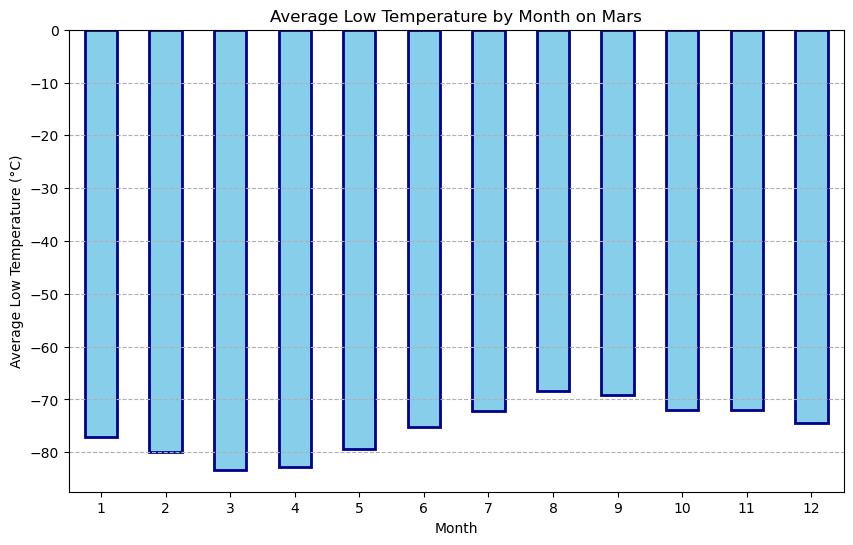

In [44]:
# Plot the average temperature by month

# Define the color for the bars and the outline
bar_color = 'skyblue'
outline_color = 'darkblue'
outline_width = 2

# Plotting the average low temperature by month
plt.figure(figsize=(10, 6))
avg_low_temp_by_month_sorted.plot(kind='bar', color=bar_color, edgecolor=outline_color, linewidth=outline_width)

plt.title('Average Low Temperature by Month on Mars')  # Title of the plot
plt.xlabel('Month')  # X-axis label
plt.ylabel('Average Low Temperature (°C)')  # Y-axis label
plt.xticks(rotation=0)
plt.grid(axis='y', linestyle='--')  # Add horizontal grid lines for better readability

# Show the plot
plt.show()


The coldest month is 3 with an average temperature of -83.30729166666667°C.
The hottest month is 8 with an average temperature of -68.38297872340425°C.


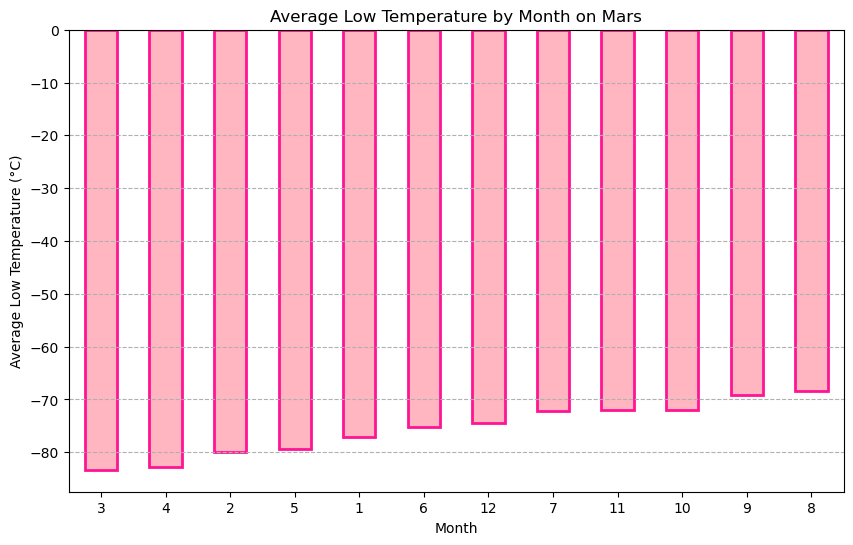

In [45]:
# Identify the coldest and hottest months in Curiosity's location

# Identify the coldest month
coldest_month = avg_low_temp_by_month_sorted.idxmin()
coldest_temp = avg_low_temp_by_month_sorted.min()

# Identify the hottest month
hottest_month = avg_low_temp_by_month_sorted.idxmax()
hottest_temp = avg_low_temp_by_month_sorted.max()

# Print the coldest and hottest months along with their average temperatures
print(f"The coldest month is {coldest_month} with an average temperature of {coldest_temp}°C.")
print(f"The hottest month is {hottest_month} with an average temperature of {hottest_temp}°C.")

# Define the color for the bars and the outline
bar_color = 'lightpink'
outline_color = 'deeppink'
outline_width = 2

# Sorting in descending order to find the hottest to coldest months
avg_low_temp_by_month_sorted_desc = avg_low_temp_by_month_sorted.sort_values(ascending=True)

# Plotting the temperatures for each month in descending order
plt.figure(figsize=(10, 6))
avg_low_temp_by_month_sorted_desc.plot(kind='bar', color=bar_color, edgecolor=outline_color, linewidth=outline_width)

plt.title('Average Low Temperature by Month on Mars')
plt.xlabel('Month')
plt.ylabel('Average Low Temperature (°C)')
plt.xticks(rotation=0)  # Set month labels without rotation
plt.grid(axis='y', linestyle='--')

# Show the plot
plt.show()



In [46]:
# 4. Average pressure by Martian month

# Calculate the average atmospheric pressure by Martian month
avg_pressure_by_month = mars_data_df.groupby('month')['pressure'].mean()

# Sorting the average pressure by month in ascending order
avg_pressure_by_month_asc = avg_pressure_by_month.sort_index()

# Display the average pressure by month in ascending order
print("Average Pressure by  Martian Month:")
print(avg_pressure_by_month_asc)


Average Pressure by  Martian Month:
month
1     862.488506
2     889.455056
3     877.322917
4     806.329897
5     748.557047
6     745.054422
7     795.105634
8     873.829787
9     913.305970
10    887.312500
11    857.014493
12    842.156627
Name: pressure, dtype: float64


The month with the lowest atmospheric pressure on Mars is: Month 6
The month with the highest atmospheric pressure on Mars is: Month 9


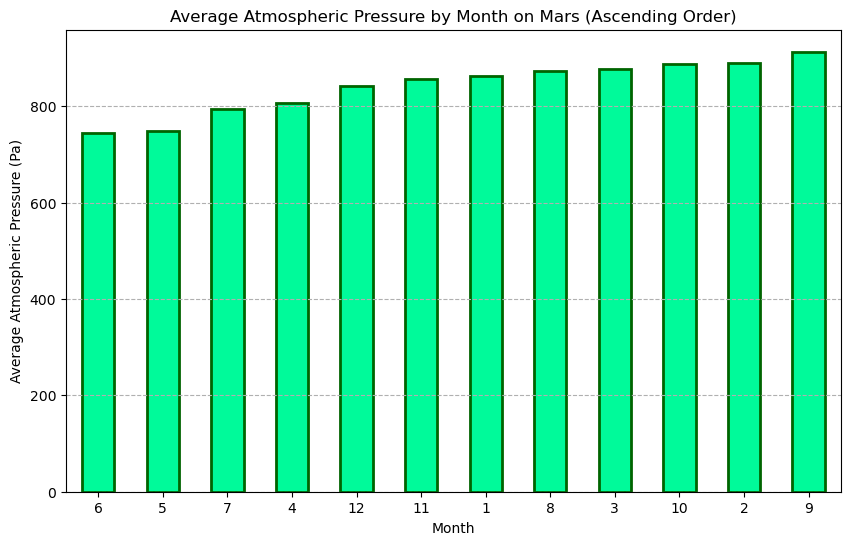

In [47]:
# Plot the average pressure by month

# Sorting the average pressure by value in ascending order
avg_pressure_by_month_values_asc = avg_pressure_by_month.sort_values(ascending=True)

# Identifying the months with the lowest and highest atmospheric pressure
lowest_pressure_month = avg_pressure_by_month_values_asc.idxmin()
highest_pressure_month = avg_pressure_by_month_values_asc.idxmax()

# Displaying the results
print(f"The month with the lowest atmospheric pressure on Mars is: Month {lowest_pressure_month}")
print(f"The month with the highest atmospheric pressure on Mars is: Month {highest_pressure_month}")

# Define the color for the bars and the outline
bar_color = 'mediumspringgreen'
outline_color = 'darkgreen'
outline_width = 2

# Plotting the average atmospheric pressure by month in ascending order of pressure
plt.figure(figsize=(10, 6))
avg_pressure_by_month_values_asc.plot(kind='bar', color=bar_color, edgecolor=outline_color, linewidth=outline_width)

plt.title('Average Atmospheric Pressure by Month on Mars (Ascending Order)')
plt.xlabel('Month')
plt.ylabel('Average Atmospheric Pressure (Pa)')
plt.xticks(rotation=0)  # Set month labels without rotation
plt.grid(axis='y', linestyle='--')

# Show the plot
plt.show()


   id terrestrial_date  sol   ls  month  min_temp  pressure
0   2       2012-08-16   10  155      6     -75.0     739.0
1  13       2012-08-17   11  156      6     -76.0     740.0
2  24       2012-08-18   12  156      6     -76.0     741.0
3  35       2012-08-19   13  157      6     -74.0     732.0
4  46       2012-08-20   14  157      6     -74.0     740.0
Number of terrestrial (Earth) days in the observed Martian year: 2022


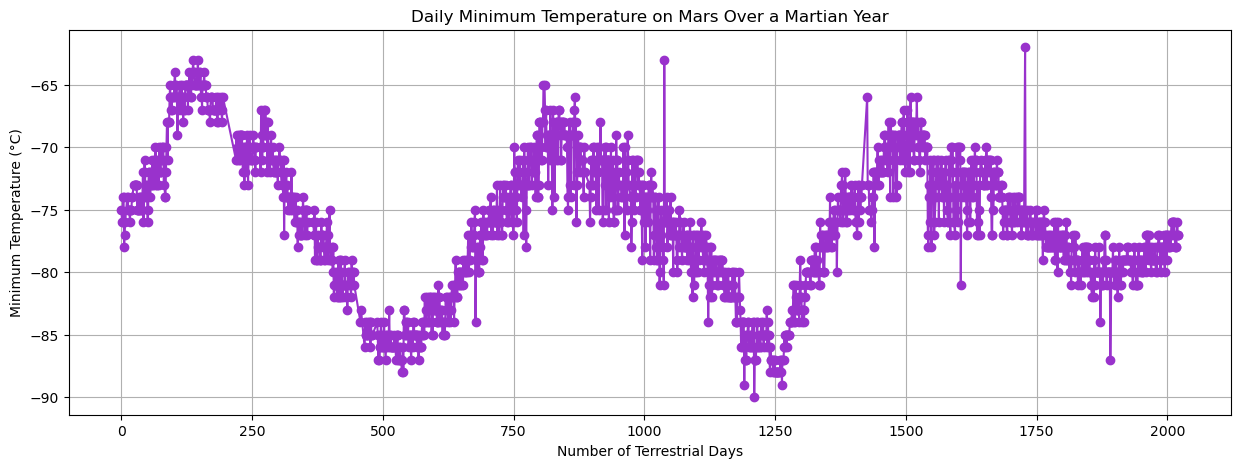

In [48]:
# 5. How many terrestrial (earth) days are there in a Martian year?

# Sort the DataFrame by the 'sol' column in ascending order
mars_data_df_sorted_sol = mars_data_df.sort_values(by='sol', ascending=True)

# Now mars_data_df_sorted_sol is sorted by sol in ascending order
print(mars_data_df_sorted_sol.head())  # Display the first few rows to confirm

# Use the sorted DataFrame for calculating terrestrial days span
start_date = mars_data_df_sorted_sol['terrestrial_date'].iloc[0]
end_date = mars_data_df_sorted_sol['terrestrial_date'].iloc[-1]

# Calculate the number of terrestrial days in the Martian year span
num_terrestrial_days = (end_date - start_date).days + 1  # +1 to include both start and end dates

print(f"Number of terrestrial (Earth) days in the observed Martian year: {num_terrestrial_days}")

# Calculate the number of terrestrial days since the start of the dataset for each entry
mars_data_df_sorted_sol['days_since_start'] = (mars_data_df_sorted_sol['terrestrial_date'] - mars_data_df_sorted_sol['terrestrial_date'].iloc[0]).dt.days

# Plot the daily minimum temperature against the number of terrestrial days since the start of the dataset
plt.figure(figsize=(15, 5))
plt.plot(mars_data_df_sorted_sol['days_since_start'], mars_data_df_sorted_sol['min_temp'], marker='o', linestyle='-', color='darkorchid')

plt.title('Daily Minimum Temperature on Mars Over a Martian Year')
plt.xlabel('Number of Terrestrial Days')  # Corrected label
plt.ylabel('Minimum Temperature (°C)')
plt.grid(True)
plt.xticks(rotation=0)  # You might want to adjust the rotation or the frequency of ticks to improve readability

# Show the plot
plt.show()



On average, the third month has the coldest minimum temperature on Mars, and the eighth month is the warmest. But it is always very cold there in human terms!



Atmospheric pressure is, on average, lowest in the sixth month and highest in the ninth.

The distance from peak to peak is roughly 1425-750, or 675 days. A year on Mars appears to be about 675 days from the plot. Internet search confirms that a Mars year is equivalent to 687 earth days.

### Step 6: Save the Data

Export the DataFrame to a CSV file.

In [49]:
# Write the data to a CSV

# Directory for CSV files
csv_directory = '../../Challenges/Web_Scraping/CSVs'
os.makedirs(csv_directory, exist_ok=True)  # Create the directory if it does not exist

# Proceed to write the CSV files

# Define the file path where you want to save the CSV file using relative paths
sol_csv_file_path = '../../Challenges/Web_Scraping/CSVs/sol_csv_file.csv'
mars_csv_file_path = '../../Challenges/Web_Scraping/CSVs/mars_csv_file.csv'

# Assuming mars_data_df_sorted_sol and mars_data_df are your DataFrames

# Write the DataFrame to a CSV file
mars_data_df_sorted_sol.to_csv(sol_csv_file_path, index=False)
print(f"Data has been written to {sol_csv_file_path}")

mars_data_df.to_csv(mars_csv_file_path, index=False)
print(f"Data has been written to {mars_csv_file_path}")



Data has been written to ../../Challenges/Web_Scraping/CSVs/sol_csv_file.csv
Data has been written to ../../Challenges/Web_Scraping/CSVs/mars_csv_file.csv


In [50]:
browser.quit()